# Simulation Examples

Words, words, words.

In [205]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import create_times
from neurodsp.plts import plot_time_series
from neurodsp.spectral import compute_spectrum

from specparam import SpectralModel, Bands
from specparam.plts import plot_spectra
from specparam.plts.utils import add_shades
from specparam.utils import trim_spectrum

In [206]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [207]:
# Plot settings
BANDS = Bands({'theta' : [3, 8],
               'alpha' : [8, 13],
               'beta' : [13, 35]})

BAND_COLORS = {'theta' : '#46b870',
               'alpha' : '#1882d9',
               'beta'  : '#a218d9'}

In [166]:
# Simulation settings
fs = 500
n_seconds = 60

In [167]:
# Create a times vector
times = create_times(n_seconds, fs)

In [174]:
comps = {'sim_powerlaw' : {'exponent' : -1.25, 'f_range' : [1., 55]}, 
         'sim_bursty_oscillation' : {'freq' : 10, 'enter_burst' : 0.25, 'leave_burst' : 0.3}}
sig = sim_combined(n_seconds, fs, comps, [0.75, 1])

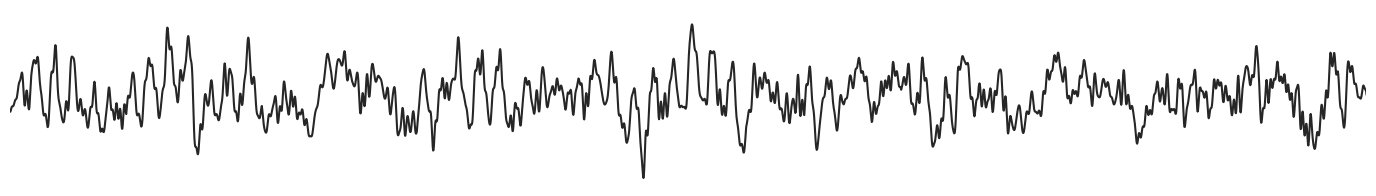

In [200]:
# Plot the time series
plot_time_series(times, sig, lw=1.5, alpha=0.85, xlim=[8, 15])
plt.gca().axis('off');
#save_fig(SAVE, 'oscillation_time_series.pdf')

In [201]:
# Compute the power spectrum
freqs, powers = compute_spectrum(sig, fs, nperseg=1.5*fs, noverlap=fs)

In [202]:
# Fit a spectral model to the 
fm = SpectralModel(verbose=False)
fm.fit(freqs, powers, freq_range=[1, 50])

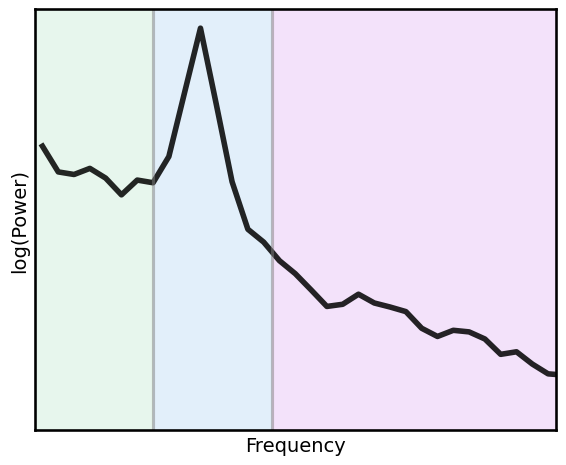

In [204]:
_, ax = plt.subplots(figsize=(6, 5))
plot_spectra(*trim_spectrum(freqs, powers, [3, 40]), alpha=0.85,
             log_freqs=False, log_powers=True, lw=4, color='black', 
             xlim=[3, 25], ax=ax)
ax.set(xticks=[], yticks=[])

ax.axvline(8, color='grey', linestyle='-', alpha=0.5)
ax.axvline(13, color='grey', linestyle='-', alpha=0.5)

add_shades(ax,
           [BANDS.theta, BANDS.alpha, BANDS.beta],
           colors=[BAND_COLORS['theta'], BAND_COLORS['alpha'], BAND_COLORS['beta']],
           alpha=0.125, logged=False)
# plt.grid()
# plt.yticks([])
# save_fig(SAVE, 'combined_psd.pdf')

## TEMP

In [196]:
def add_shades(ax, shades, colors='r', add_center=False, logged=False, alpha=0.2):

    # If only one shade region is specified, this embeds in a list, so that the loop works
    if not isinstance(shades[0], list):
        shades = [shades]

    colors = repeat(colors) if not isinstance(colors, list) else colors

    for shade, color in zip(shades, colors):

        shade = np.log10(shade) if logged else shade

        ax.axvspan(shade[0], shade[1], color=color, alpha=alpha, lw=0)

        if add_center:
            center = sum(shade) / 2
            ax.axvspan(center, center, color='k', alpha=0.6)